In [4]:
import numpy as np
import json
from src.simulation import get_spectra
from pathlib import Path

path = Path('simulated_data')

sps = get_spectra(20, ['Al', 'Fe'], save=True)

In [2]:
sps

(array([[1.001e-15, 9.174e-11, 2.215e-09, ..., 1.416e-09, 7.649e-10,
         4.110e-10],
        [9.484e-16, 8.691e-11, 2.099e-09, ..., 1.342e-09, 7.246e-10,
         3.893e-10],
        [8.957e-16, 8.208e-11, 1.982e-09, ..., 1.267e-09, 6.844e-10,
         3.677e-10],
        ...,
        [1.054e-16, 9.657e-12, 2.332e-10, ..., 1.491e-10, 8.052e-11,
         4.326e-11],
        [5.269e-17, 4.828e-12, 1.166e-10, ..., 7.454e-11, 4.026e-11,
         2.163e-11],
        [2.829e-13, 2.829e-13, 2.829e-13, ..., 4.319e-19, 4.319e-19,
         4.319e-19]]),
 array([198.75, 198.8 , 198.85, ..., 979.94, 979.99, 980.04]))

[-1.  0.  1.]


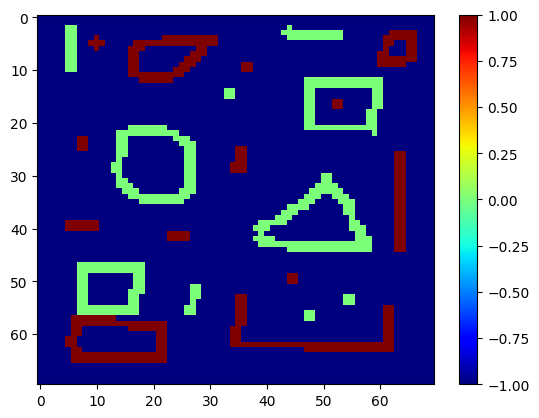

In [54]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

img = np.array(json.load(open(path / 'deleteme.json', 'r')), dtype=float)
print(np.unique(img))
plt.imshow(img, cmap='jet', aspect='auto')
plt.colorbar()

In [ ]:
kernel = np.asarray([
    [1, 1, 1],
    [1, 8, 1],
    [1, 1, 1],
], dtype=float)
kernel /= kernel.sum()

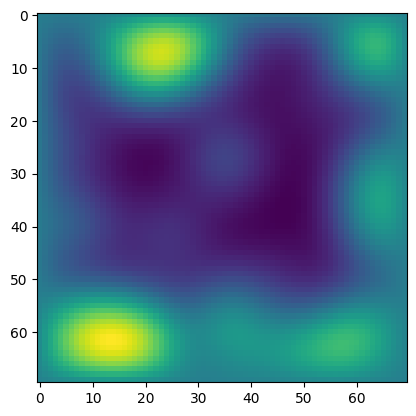

In [51]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

zero_img = np.zeros(img.shape)
zero_img[img == 1] = 1.
zero_img[img != 1] = 0.

for i in range(100):
    zero_img = convolve2d(zero_img, kernel, mode='same', boundary='fill', fillvalue=.1)
plt.imshow(zero_img)

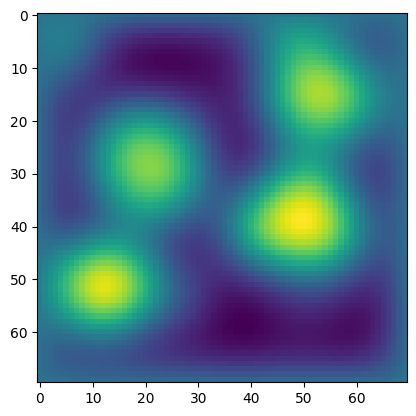

In [55]:
one_img = np.zeros(img.shape)
one_img[img == 0] = 1.
one_img[img != 0] = 0.

for i in range(100):
    one_img = convolve2d(one_img, kernel, mode='same', boundary='fill', fillvalue=.1)
plt.imshow(one_img)

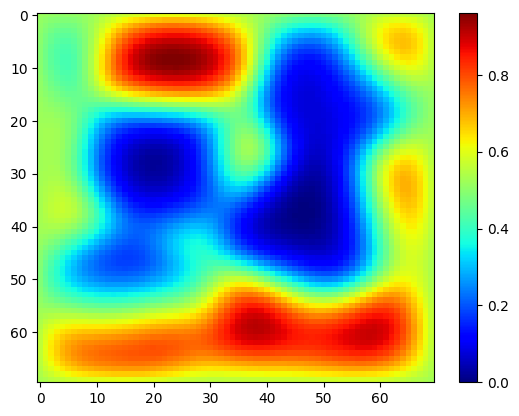

In [73]:
result = zero_img / (zero_img + one_img)
result -= result.min()
result /= result.max()

plt.imshow((result - result.min()) / result.max(), cmap='jet', aspect='auto')
plt.colorbar()

In [65]:
result = zero_img / (zero_img + one_img)
result

array([[0.49546138, 0.4912911 , 0.48784406, ..., 0.52653133, 0.5187245 ,
        0.5097192 ],
       [0.49109941, 0.48289839, 0.47609781, ..., 0.55047502, 0.53586007,
        0.5187519 ],
       [0.48708686, 0.47514527, 0.46520317, ..., 0.57077507, 0.55059432,
        0.52663577],
       ...,
       [0.52376989, 0.54639423, 0.56752822, ..., 0.5554584 , 0.53683148,
        0.51826444],
       [0.51659141, 0.53257348, 0.54770224, ..., 0.53729248, 0.52482622,
        0.51235026],
       [0.50854247, 0.51686827, 0.52485327, ..., 0.51864756, 0.51244849,
        0.50621484]])